## End term submission for DAEP.
- Comparing the productivity of different teams or departments to identify best practices and areas for improvement.
- Checking what factors really affect the productivity of garment workers. 
- Performing EDA on the dataset to find the effect of each of the factor on the workers in general and will lookout for any trends.
- Required libraries have been used have been imported for the same.

#### Importing the libraries.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/kaggle/input/productivity-prediction-of-garment-employees/garments_worker_productivity.csv


#### Reading the CSV file.

In [2]:
df = pd.read_csv('/kaggle/input/productivity-prediction-of-garment-employees/garments_worker_productivity.csv')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


#### Seeing the basic info of the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

#### We can see from above that there are 1197 rows(entries) and 15 columns(features) present in the dataset.

In [4]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [5]:
df.shape

(1197, 15)

#### Performing EDA on the dataset to see what group of the garment workers works the most and what drives productivity.

Text(0.5, 1.0, 'distribution of work in the respective quarters')

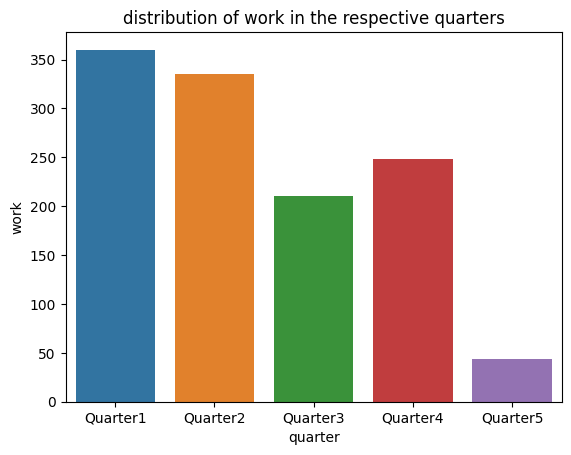

In [6]:
sns.countplot(x = 'quarter', data = df)
plt.ylabel('work')
plt.title('distribution of work in the respective quarters')

In [7]:
df['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

#### We can notice the wrong spelling of the sewing department and also that the finishing is redundant.

In [8]:
df.loc[df.department == 'sweing', 'department'] = 'sewing'
df.loc[df.department == 'finishing ', 'department'] = 'finishing'

df.department.unique()

array(['sewing', 'finishing'], dtype=object)

#### Adding new features net_productivity and profitable_productivity

In [9]:
df['net_productivity'] = df['actual_productivity'] - df['targeted_productivity']
df['profitable_productivity'] = np.where((df['actual_productivity'] - df['targeted_productivity']) > 0, 1, 0)
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,net_productivity,profitable_productivity
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,0.140725,1
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,0.136500,1
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.000570,1
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.000570,1
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,0.000382,1


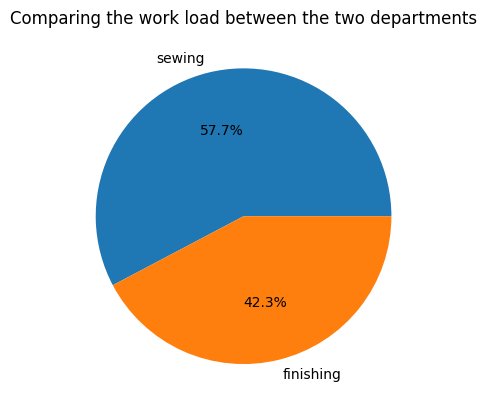

In [10]:
s = df['department'].value_counts()
plt.pie(s.values, labels = s.index, autopct = '%1.1f%%')
plt.title('Comparing the work load between the two departments')
plt.show()

#### We can observe from the above pie chart that the sewing department has more work than the finishing department.

In [11]:
df.groupby(['quarter', 'department'])['profitable_productivity'].mean() * 100

quarter   department
Quarter1  finishing     62.416107
          sewing        83.412322
Quarter2  finishing     63.945578
          sewing        81.382979
Quarter3  finishing     45.679012
          sewing        78.294574
Quarter4  finishing     55.555556
          sewing        84.285714
Quarter5  finishing     85.714286
          sewing        82.608696
Name: profitable_productivity, dtype: float64

##### From the above output we can observe that the sewing department is always performing better than the finishing department.

In [12]:
df.groupby(['team', 'department'])['net_productivity'].median().sort_values(ascending = False).head(10)

team  department
5     finishing     0.159564
3     finishing     0.121704
4     finishing     0.108824
1     finishing     0.103667
      sewing        0.075336
12    finishing     0.069091
10    finishing     0.040533
2     finishing     0.036879
9     finishing     0.026868
2     sewing        0.000594
Name: net_productivity, dtype: float64

##### Top performing teams for each of the departments.
- team 1 for sewing.
- team 5 for finishing.

<Axes: xlabel='smv', ylabel='net_productivity'>

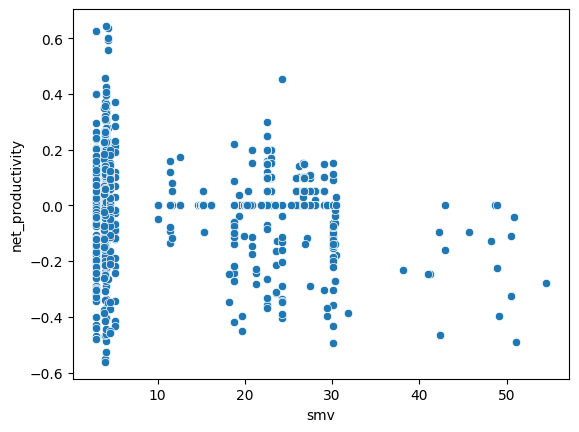

In [13]:
sns.scatterplot(x = 'smv', y = 'net_productivity', data = df)

#### Dividing the work given to a particular task(smv) into three categories.

In [14]:
d = {}
for i in df['smv']:
    if i < 10.0:
        d[i] = 'Less'
    elif i >= 10.0 and i < 35.0:
        d[i] = 'Moderate'
    else:
        d[i] = 'More'
        
df['smv'] = df['smv'].map(d)

df.groupby('smv')['profitable_productivity'].mean().sort_values(ascending = False) * 100

smv
Moderate    83.803863
Less        59.683794
More        16.666667
Name: profitable_productivity, dtype: float64

##### When the time taken for a work is in the range(less to modrate) teams generally perform better.
##### Around 83.8% of moderate smv have profitable productivity.
##### Around 59.7% of less smv have profitable productivity.

Text(0.5, 1.0, 'Overtime vs Profitable Productivity')

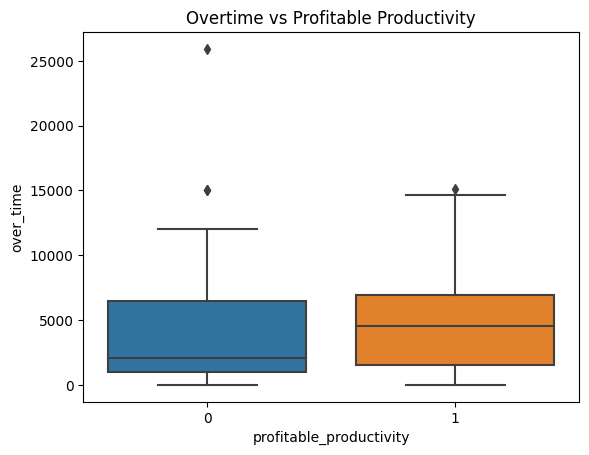

In [15]:
sns.boxplot(y = 'over_time', x = 'profitable_productivity', data = df)
plt.title('Overtime vs Profitable Productivity')

##### The median overtime for profitable productivity = 1 is higher. Which means the output is better if there is some overtime.

<Axes: xlabel='incentive', ylabel='Count'>

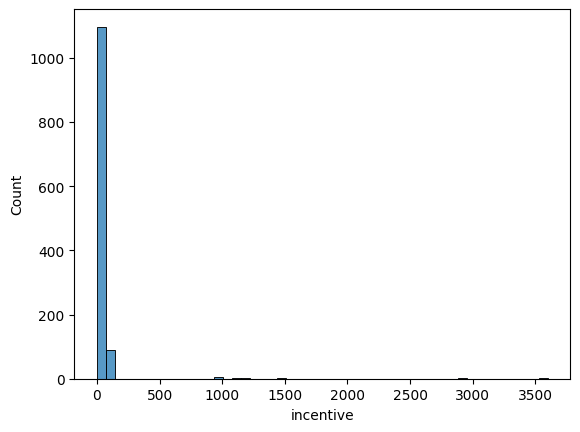

In [16]:
sns.histplot(df['incentive'], bins = 50)

##### Most of the employees don't get an incentive.

In [17]:
df.groupby(['department', 'team'])['incentive'].mean().sort_values(ascending = False).head(25)

department  team
finishing   5       82.285714
            9       78.260870
sewing      1       70.232143
            3       56.344828
            2       52.017544
            12      50.830508
            9       47.189655
            10      46.894737
            4       46.101695
            11      40.271186
finishing   3       38.918919
sewing      6       36.169492
finishing   11      33.103448
sewing      8       31.285714
            5       29.137931
            7       27.109091
finishing   12      27.000000
            2       23.076923
            10      22.325581
            4       20.869565
            1       19.591837
            8       18.113208
            6        0.000000
            7        0.000000
Name: incentive, dtype: float64

##### From the above data we can see that the top performing teams get the most incentive or vice-versa.

In [18]:
df.groupby('department')['profitable_productivity'].mean()

department
finishing    0.596838
sewing       0.820550
Name: profitable_productivity, dtype: float64

#### Sewing department gets the most incentive in most of the teams since they're more efficient in general.

Text(0.5, 1.0, 'Team vs Incentives')

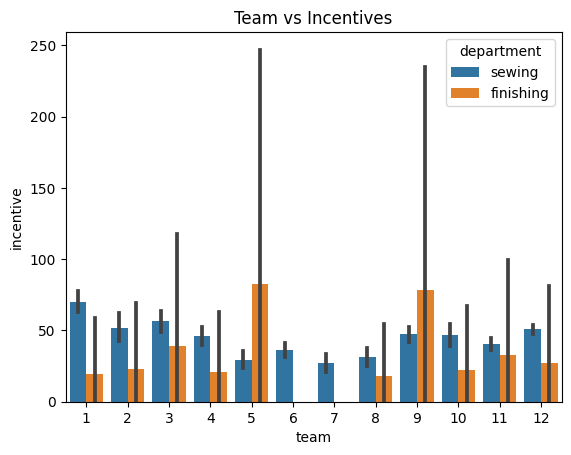

In [19]:
sns.barplot(x = 'team', y = 'incentive', hue = 'department', data = df)
plt.title('Team vs Incentives')

<Axes: xlabel='idle_time', ylabel='net_productivity'>

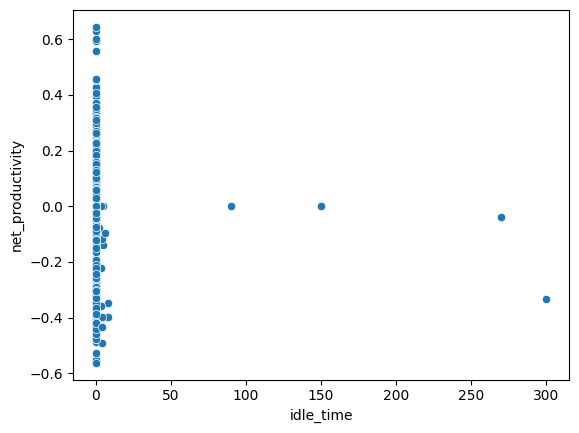

In [20]:
sns.scatterplot(x = 'idle_time', y = 'net_productivity', data = df) 

##### Majority of the workers have little to no idle time.

<Axes: xlabel='no_of_workers', ylabel='net_productivity'>

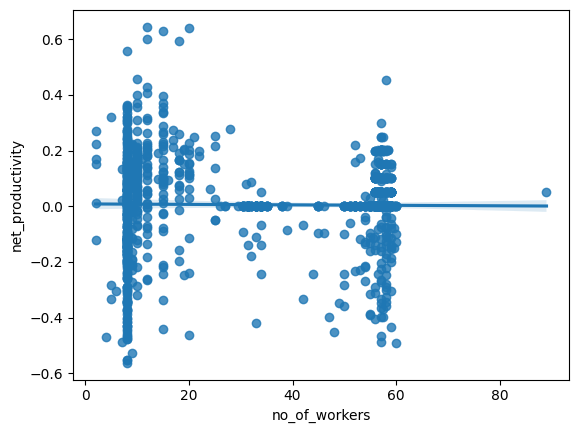

In [21]:
sns.regplot(x = 'no_of_workers', y = 'net_productivity', data = df)

##### Productivity is not indicated by the number of workers present in a team.

In [22]:
df.groupby(['team', 'profitable_productivity'])[['over_time', 'incentive']].mean().tail(15)

over_time  incentive
team profitable_productivity                        
5    1                        5313.529412  62.441176
6    0                        2142.580645   1.096774
     1                        3972.619048  33.333333
7    0                        3385.500000   1.700000
     1                        5908.392857  25.410714
8    0                        3315.000000  21.400000
     1                        5157.457627  27.830508
9    0                        3116.470588  13.647059
     1                        5200.285714  83.900000
10   0                        3793.125000  38.875000
     1                        5180.735294  35.132353
11   0                        4041.600000  13.440000
     1                        4461.904762  47.619048
12   0                        2518.125000   3.500000
     1                        3472.108434  48.469880

<Axes: >

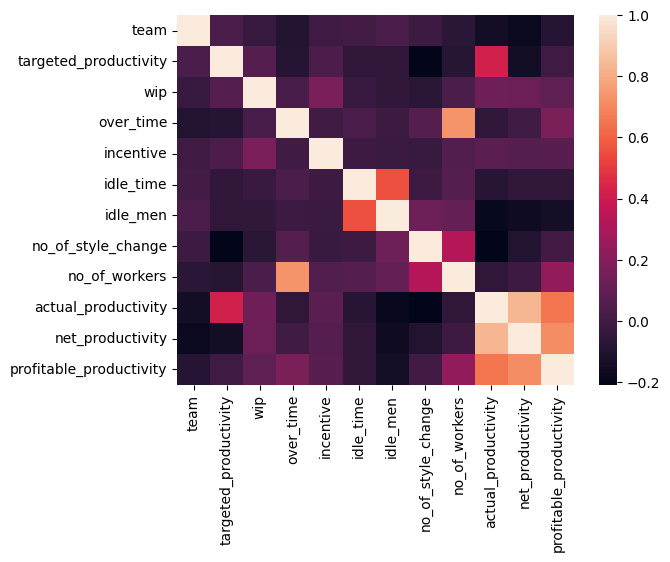

In [23]:
numeric_df = df.select_dtypes(include='number') # Choosing only the numeric columns for the correlation matrix.
sns.heatmap(numeric_df.corr())

# Final thoughts to have a greater productivity:
- Getting more incentives increases tendency of profitable productivity as the teams(workers) are motivated for overtime.
- Teams with higher productivity often work more overtime than the rest.
- Time taken for work in range (less to medium) is more profitable.